<a href="https://colab.research.google.com/github/FarshadAmiri/Learning-Machine_Learning/blob/master/K_means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
import operator

In [2]:
data1 = np.random.normal(75,15, size=(70,2))
data2_1 = np.random.normal(20,14, size=(80,1))
data2_2 = np.random.normal(80,12, size=(80,1))
data2 = np.hstack((data2_1,data2_2))
data3 = np.random.normal(loc=35, scale=10, size=(110,2))
data4_1 = np.random.normal(75,11, size=(50,1))
data4_2 = np.random.normal(25,9, size=(50,1))
data4 = np.hstack((data4_1,data4_2))
data = np.vstack((data1,data2,data3,data4))

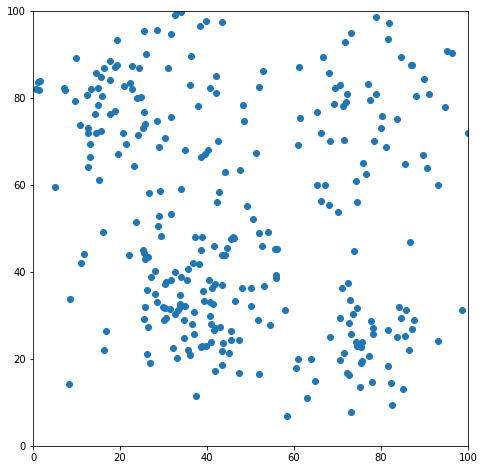

In [3]:
plt.figure(figsize=(8,8))
plt.xlim(0,100)
plt.ylim(0,100)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(data[:,0], data[:,1])

In [56]:
def kmeans(data, k, stop_threshold_based_on_mean_distance=0.0001):
  # creating data dictionary (naming each sample)
  data_dict = {}
  for i in range(len(data)):
    a,b = data[i]
    data_dict['d' + str(i+1)] = (a,b)

  # Initializing the centroids
  centroids = np.random.randint((data.min()+data.max()/4),(data.min()+data.max()/1.25),(k,2))
  c_dict = {}
  for i in range(k):
    c_dict['c' + str(i+1)] = tuple(centroids[i])

  plot_dict = {}
  mean_dst = {}   #Mean distance of data points from each corresponding centroid (it's a metric)

  max_iterations = 100
  for iteration in range(max_iterations) :

    # Calculate each sample distance from each centroid
    dst_dict = {}
    for i in data_dict:
      dst_dict[i] = []
      for j in range(k):
        dst = distance.euclidean(data_dict[i], c_dict['c' + str(j+1)])
        dst_dict[i].append(dst)
        
    # Assigning each sample to its closest centroid
    assignments_dict = {}
    for i in dst_dict:
      assignments_dict[i] = 'c' + str(dst_dict[i].index(min(dst_dict[i])) + 1)

    members_dict = {}
    for i in assignments_dict:
      if assignments_dict[i] in members_dict:
        members_dict[assignments_dict[i]].append(i)
      else:
        members_dict[assignments_dict[i]] = [i]

    for i in members_dict:
      x = 0
      y = 0
      for j in members_dict[i]:
        x += data_dict[j][0]
        y += data_dict[j][1]
      x /= len(members_dict[i])
      y /= len(members_dict[i])
      c_dict[i] = (x,y)


    for i in members_dict:
      plot_dict[str(i)+ '_x_' + str(iteration+1)] = []
      plot_dict[str(i)+ '_y_' + str(iteration+1)] = []
      for j in members_dict[i]:
        plot_dict[str(i)+ '_x_' + str(iteration+1)].append(data_dict[j][0])
        plot_dict[str(i)+ '_y_' + str(iteration+1)].append(data_dict[j][1])

    cumulative_distance = 0
    for i in members_dict:
      for j in members_dict[i]:
        cumulative_distance = distance.euclidean(data_dict[j],c_dict[i])
    cumulative_distance /= len(data_dict.keys())
    mean_dst['mean distance for iteration' + str(iteration + 1)] = cumulative_distance
    
    iterations = iteration + 1
    if iterations >3:
      if abs((mean_dst['mean distance for iteration' + str(iteration + 1)] - mean_dst['mean distance for iteration' + str(iteration)]) / (mean_dst['mean distance for iteration' + str(iteration)])) <stop_threshold_based_on_mean_distance:
        break
    
  for j in range(iterations):
    for i in range(int(len(plot_dict.keys())/(2*iterations))):
      plt.scatter(x = plot_dict['c' + str(i+1) + '_x_' + str(j+1)], y = plot_dict['c' + str(i+1) + '_y_' + str(j+1)])
      plt.title(f'Iteration No. {j+1}\nmean distance of data points from their centroids = {mean_dst["mean distance for iteration" + str(j + 1)]:.4f}')
    if j == iterations - 1:
      break
    else:
      plt.pause(0.5)
  return (members_dict ,c_dict, data_dict)

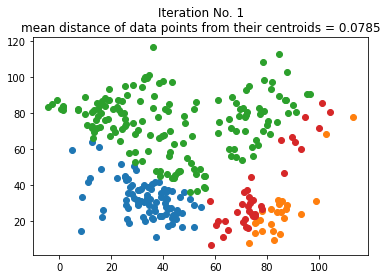

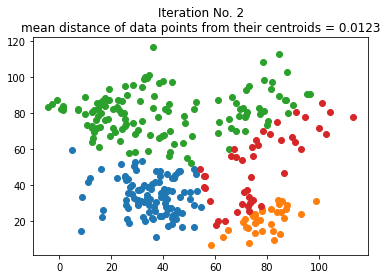

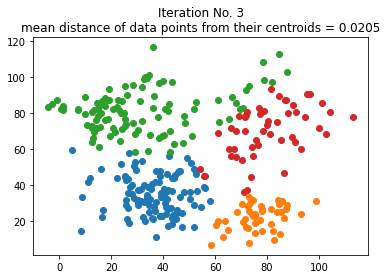

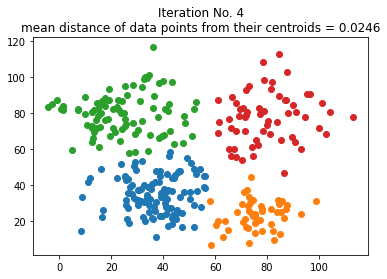

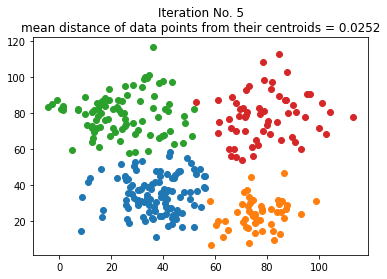

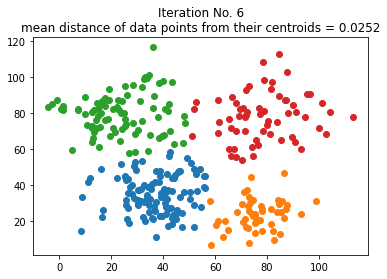

In [100]:
m,c,d = kmeans(data, k=4)

In [132]:
def predict_kmeans(data_point, c_dict):
  prediction_dict = {}
  for c in c_dict:
    c_dist = distance.euclidean(c_dict[c], data_point)
    prediction_dict[c] = c_dist
    print('Distance from ' + c + ' is ' + f'{c_dist:.3f}')
  best_centroid = min(prediction_dict.items(), key=operator.itemgetter(1))[0]
  print('--------------------')
  print('Best centroid seems to be',best_centroid, f'({c_dict[best_centroid][0]:.3f}, {c_dict[best_centroid][1]:.3f})' ,'\n')
  print('Prportional distances')
  for c in prediction_dict:
    print(f'Distance from {c} = {(prediction_dict[c] / prediction_dict[best_centroid]):.3f}')
  return (prediction_dict)

In [133]:
pred = predict_kmeans((85,58),c)

Distance from c1 is 53.335
Distance from c2 is 35.302
Distance from c3 is 65.427
Distance from c4 is 21.160
--------------------
Best centroid seems to be c4 (78.316, 78.077) 

Prportional distances
Distance from c1 = 2.521
Distance from c2 = 1.668
Distance from c3 = 3.092
Distance from c4 = 1.000
